# 1. Read the dataset to python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data=pd.read_excel('iris.xls')

In [3]:
# top 5 rows
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do the necessary pre-processing steps

In [4]:
# dataset shape
data.shape

(150, 5)

In [5]:
# To display stats about data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#To basic info about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#To display no.of samples on each class
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [8]:
# classifiation column unique values
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
# To display columns names
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
# no.of unique values
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [11]:
# dataset null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

null values are presented in SL,SW,PL and PW columns.

In [12]:
# selecting null values presented columns
freqgraph=data[['SL','SW','PL']]

In [13]:
freqgraph

,SL,SW,PL
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,NaN,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,NaN
148,6.2,3.4,5.4


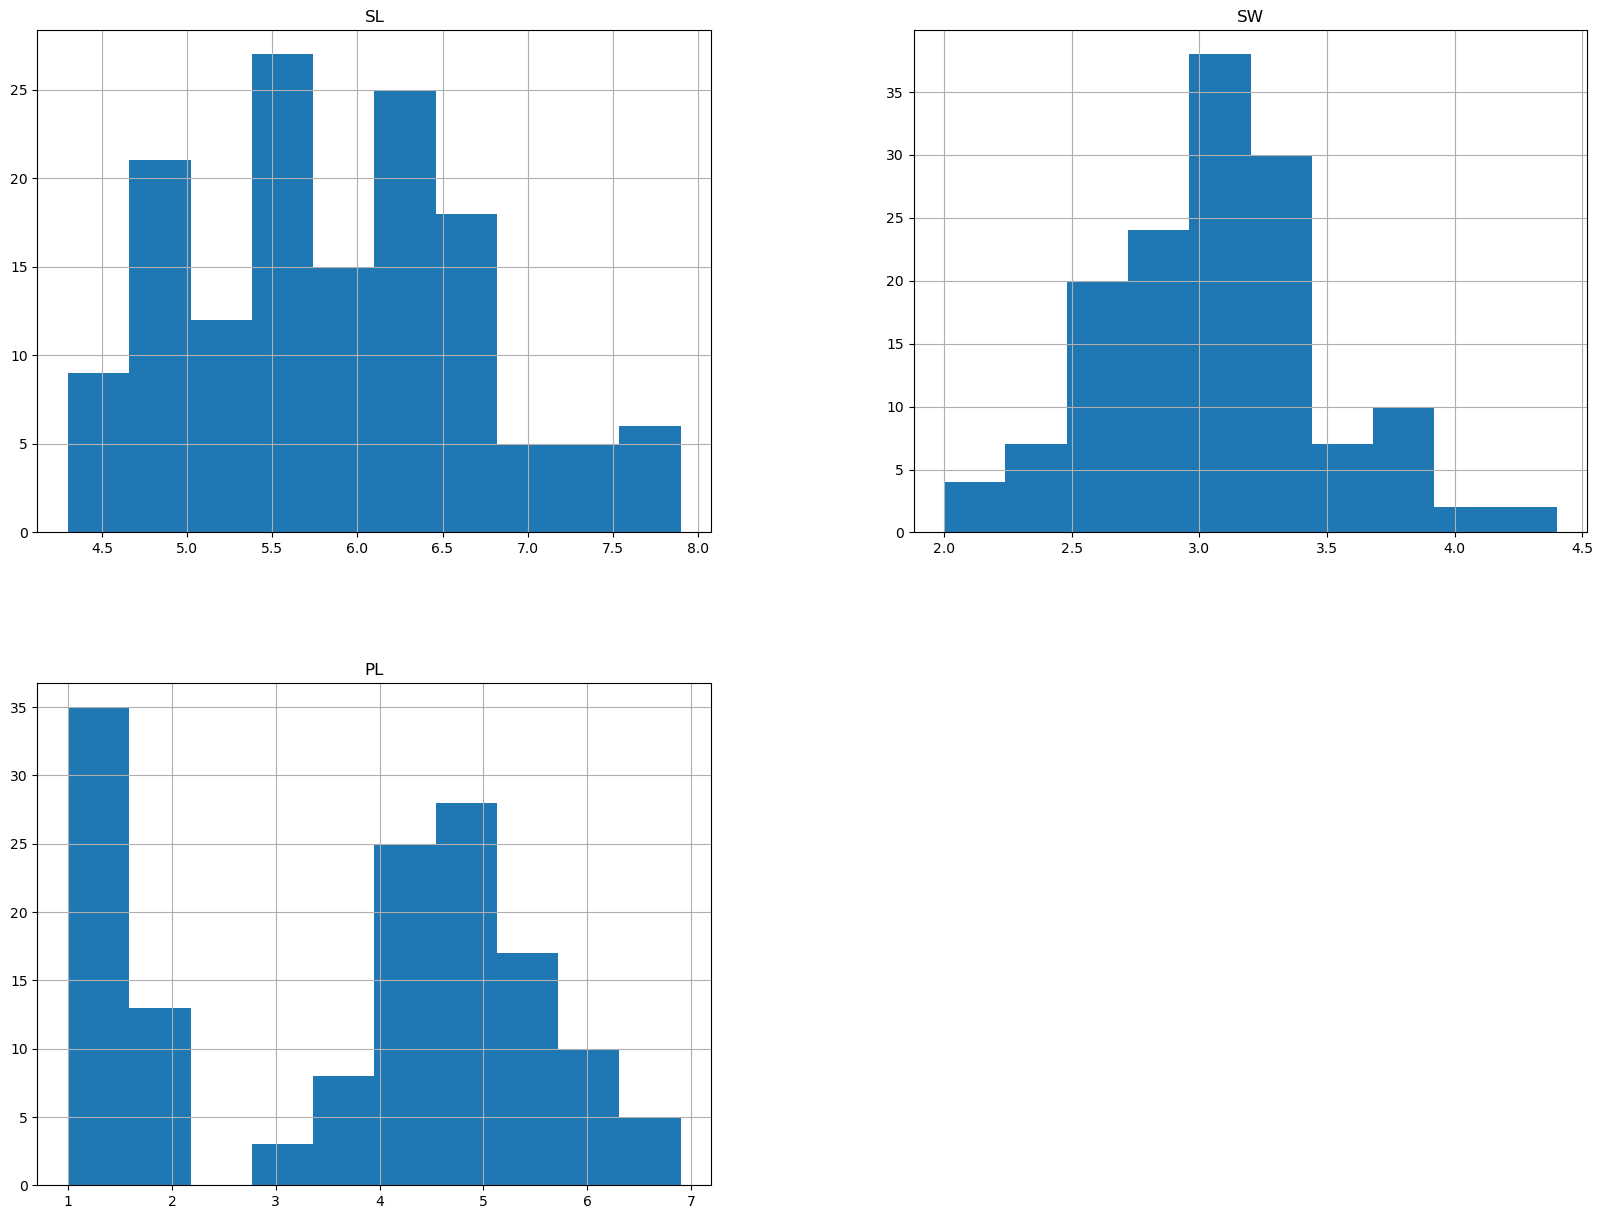

In [14]:
# checking distribution of null values presented columns
freqgraph.hist(figsize=(20,15));

Here SW follows normal distribution, while SL is lightly right skewed. so median is used to fill null values.

In [15]:
# null values are filling with median
for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [16]:
# again checking null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All null values are filled

In [17]:
# correlation matrix
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099107,0.830554,0.800939
SW,-0.099107,1.000000,-0.405531,-0.338655
PL,0.830554,-0.405531,1.000000,0.936089
PW,0.800939,-0.338655,0.936089,1.000000


<AxesSubplot:>

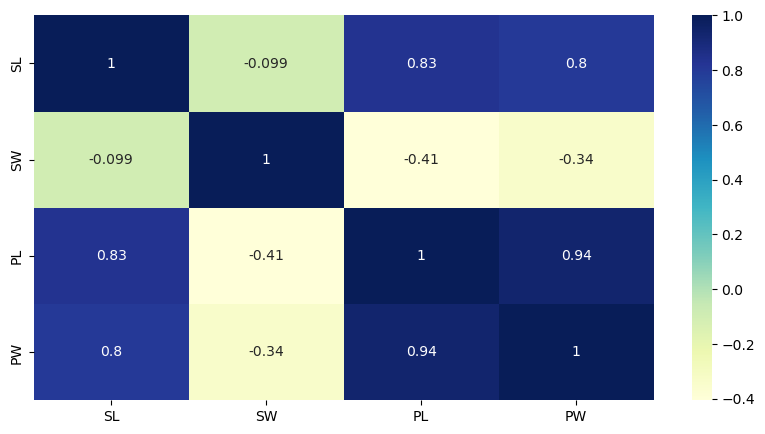

In [18]:
# correlation using heatmap
corr=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True, cmap='YlGnBu')

Here PL and PW are highly correlated, while SL and SW are not correlated.

In [19]:
# categorial column classification is converting into numerical column using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3. Find out which classification model gives the best result (try all the classification algorithms discussed in                       the session)

In [20]:
# separate feature and target
x=data.drop('Classification',axis=1)
y=data['Classification']

In [21]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

### Logistic regression

In [23]:
# train and test dataset split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
model_log= LogisticRegression()
model_log.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# prediction
y_pred=model_log.predict(x_test)

In [26]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [27]:
# confusion matrix, accuracy score, classification report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [28]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [29]:
# accuracy score
accuracy_score(y_test,y_pred)

1.0

In [30]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=7)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
# prediction
y_pred2=model_knn.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
y_pred2

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [34]:
# confusion matrix
print(confusion_matrix(y_test,y_pred2))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [35]:
# accuracy score
accuracy_score(y_test,y_pred2)

0.9666666666666667

In [36]:
# classification report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Support Vector Machine(SVM)

In [37]:
from sklearn.svm import SVC
model_svm=SVC(kernel='linear')
model_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
# prediction
y_pred3=model_svm.predict(x_test)

In [39]:
y_pred3

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [40]:
# confusion matrix
print(confusion_matrix(y_test,y_pred3))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
# accuracy score
accuracy_score(y_test,y_pred3)

1.0

In [42]:
# classifier report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Desicion Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
# prediction
y_pred4=model_dtree.predict(x_test)

In [45]:
y_pred4

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [46]:
# confusion matrix
print(confusion_matrix(y_test,y_pred4))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [47]:
# accuracy score
accuracy_score(y_test,y_pred4)

1.0

In [48]:
# classifier report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



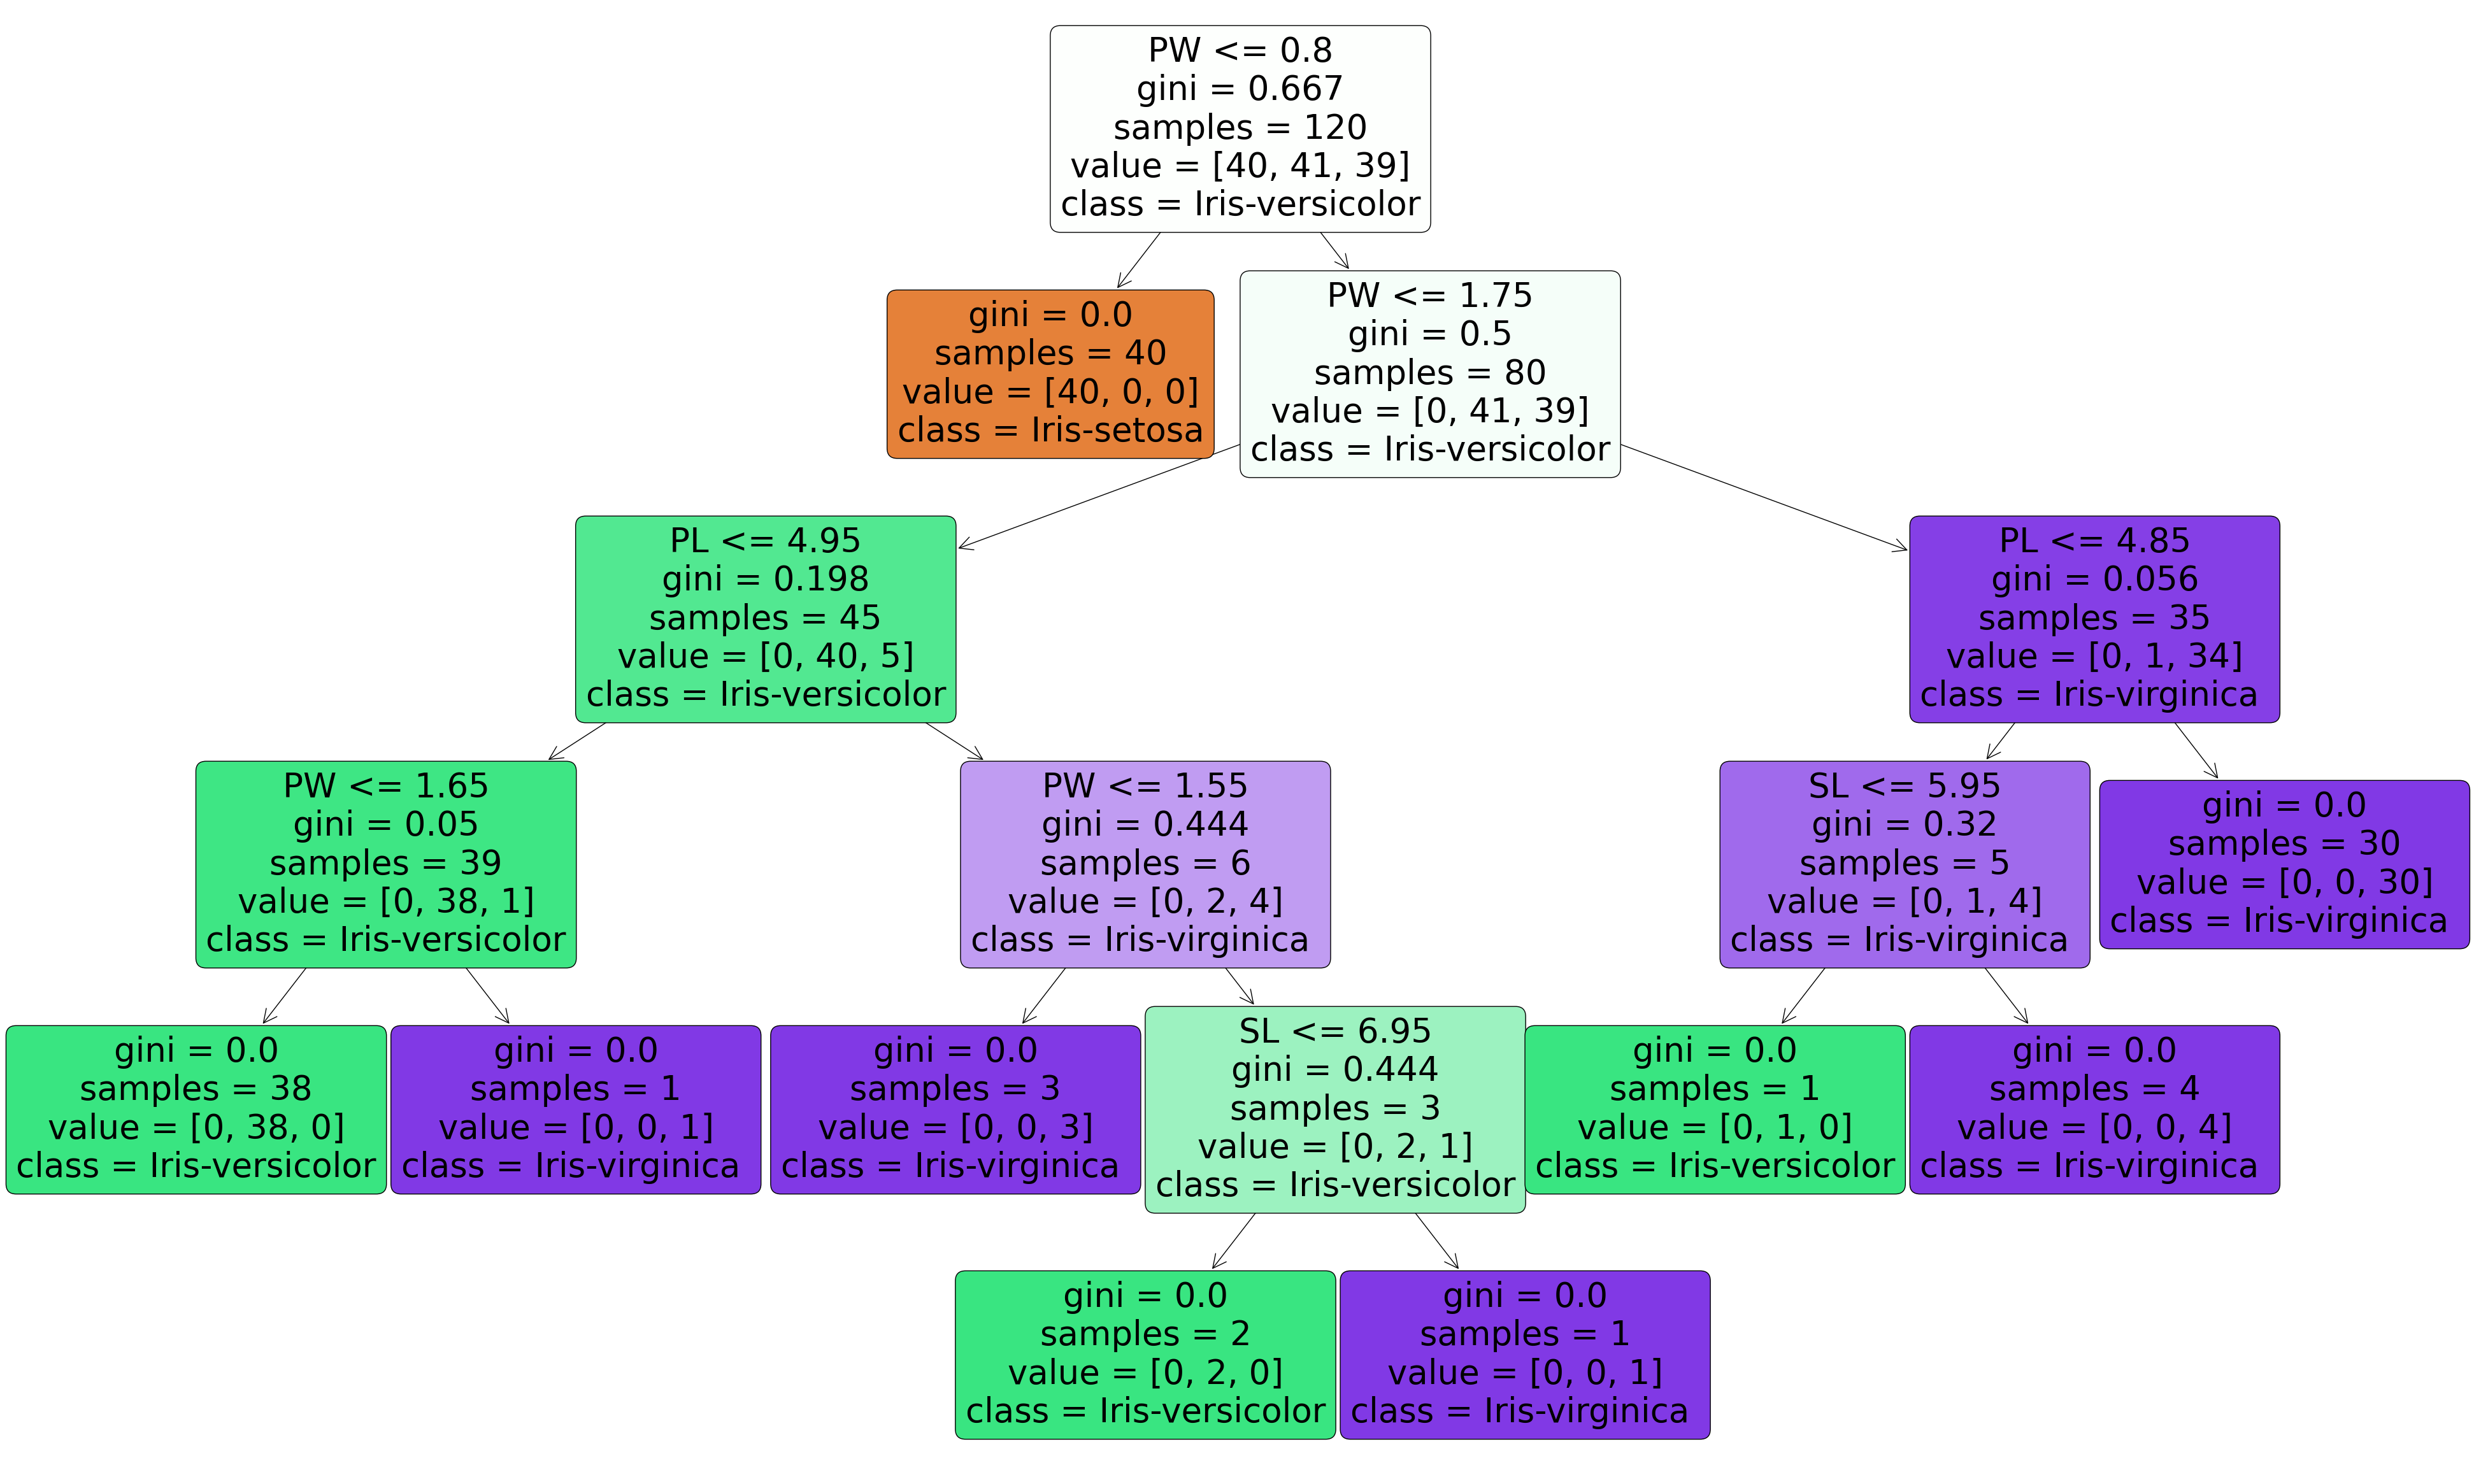

In [49]:
# decision tree visualisation
from sklearn import tree
fig=plt.figure(figsize=(50,30))
tree.plot_tree(model_dtree,filled=True,feature_names=['SL', 'SW', 'PL','PW'] ,class_names=['Iris-setosa','Iris-versicolor',
                                                                                      'Iris-virginica '],rounded=True);


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
model_rfest=RandomForestClassifier()
model_rfest.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred5=model_rfest.predict(x_test)

In [52]:
y_pred5

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [53]:
# confusion matrix
print(confusion_matrix(y_test,y_pred5))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [54]:
# accuracy score
accuracy_score(y_test,y_pred5)

1.0

In [55]:
#classification report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



iris dataset is a  very predictable dataset and contains few features,so that iris dataset is perfoming well in all classification models.Its a small dataset so accuracy is greater or equal to 0.967.iris dataset gives best result in all classification models(all classification models accuracy are good).